In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import numpy as np
from sklearn.model_selection import GridSearchCV
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pandas as pd

In [2]:
data=pd.read_csv("/Users/lovishmiglani/Desktop/Weather-pred-main/seattle-weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
data.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [4]:
data.shape

(1461, 6)

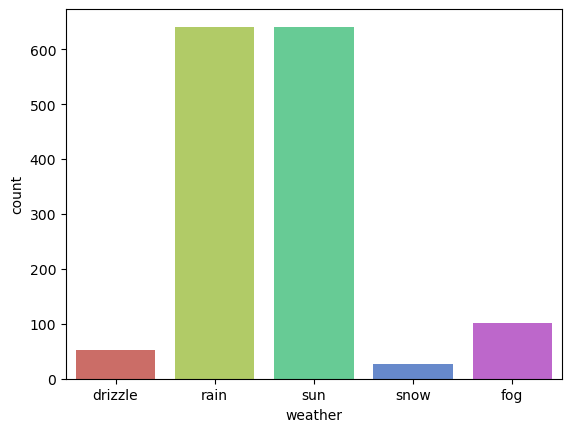

In [5]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x="weather", data=data, palette='hls')
plt.show()

In [6]:
countrain=len(data[data.weather=='rain'])
countsun=len(data[data.weather=='sun'])
countdrizzle=len(data[data.weather=='drizzle'])
countsnow=len(data[data.weather=='snow'])
countfog=len(data[data.weather=='fog'])
print('percent of rain:{:2f}%'.format((countrain/(len(data.weather))*100)))
print('percent of sun:{:2f}%'.format((countsun/(len(data.weather))*100)))
print('percent of drizzle:{:2f}%'.format((countdrizzle/(len(data.weather))*100)))
print('percent of snow:{:2f}%'.format((countsnow/(len(data.weather))*100)))
print('percent of fog:{:2f}%'.format((countfog/(len(data.weather))*100)))

percent of rain:43.874059%
percent of sun:43.805613%
percent of drizzle:3.627652%
percent of snow:1.779603%
percent of fog:6.913073%


In [7]:
data[['precipitation','temp_max','temp_min','wind']].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


<Axes: xlabel='wind', ylabel='Count'>

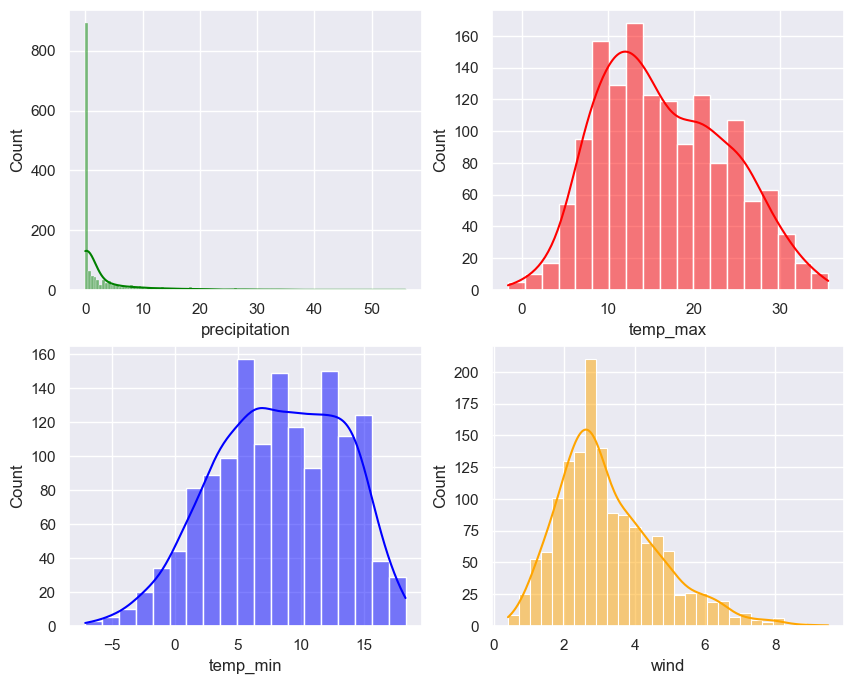

In [8]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x='precipitation',kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x='temp_max',kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x='temp_min',kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=data,x='wind',kde=True,ax=axs[1,1],color='orange')

<Axes: xlabel='wind'>

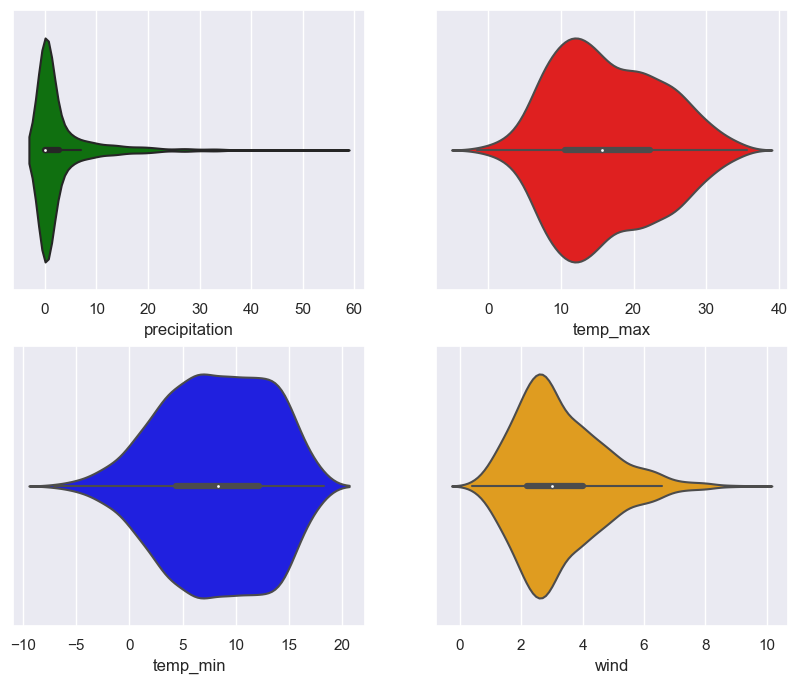

In [9]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=data,x='precipitation',kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=data,x='temp_max',kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=data,x='temp_min',kde=True,ax=axs[1,0],color='blue')
sns.violinplot(data=data,x='wind',kde=True,ax=axs[1,1],color='orange')

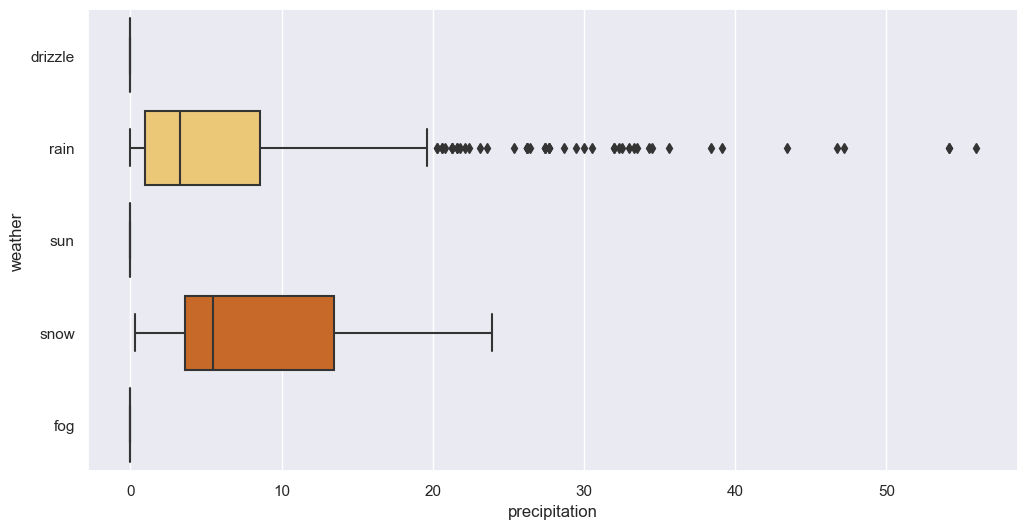

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(x='precipitation', y='weather', data=data, palette='YlOrBr')
plt.show()

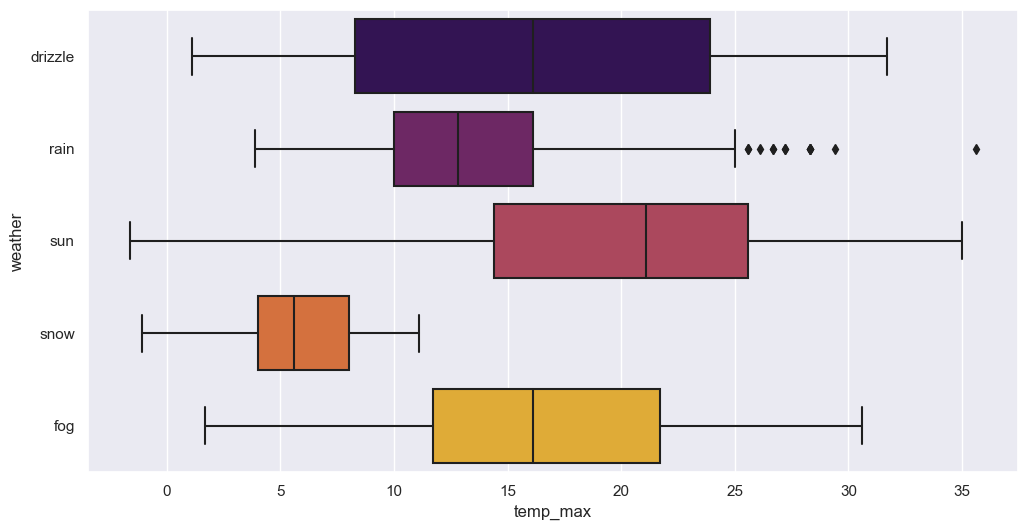

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(x= 'temp_max', y= 'weather',data=data,palette='inferno')
plt.show()

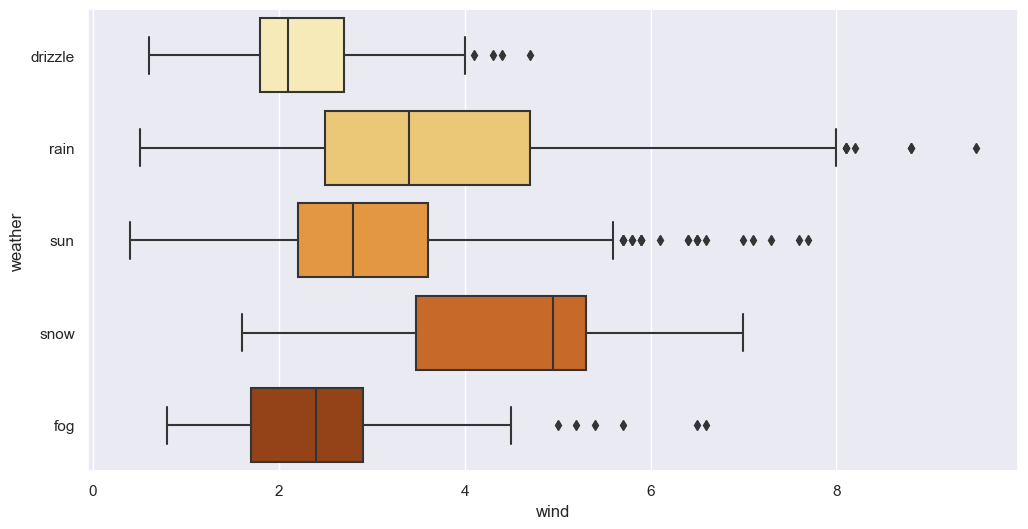

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x= 'wind',y= 'weather',data=data,palette='YlOrBr')
plt.show()

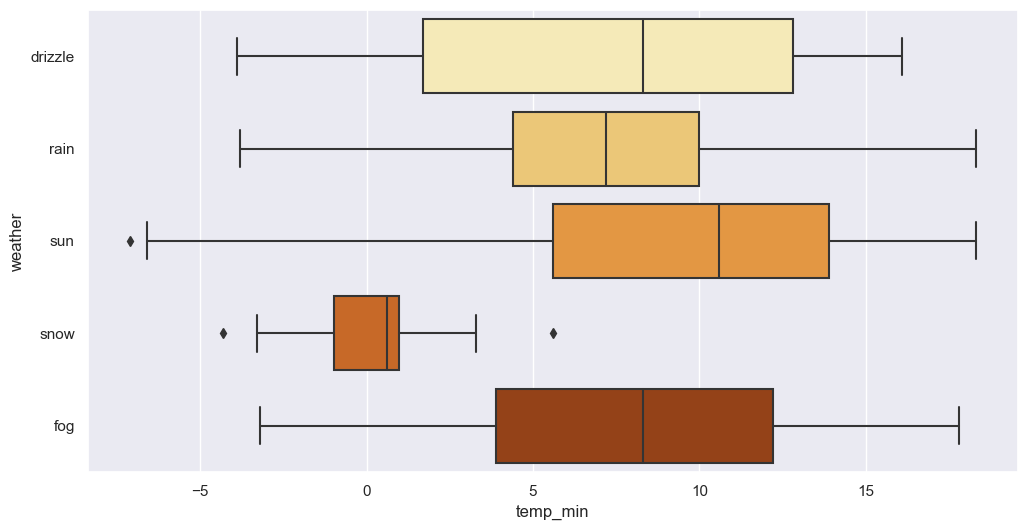

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x= 'temp_min',y= 'weather',data=data,palette='YlOrBr')
plt.show()

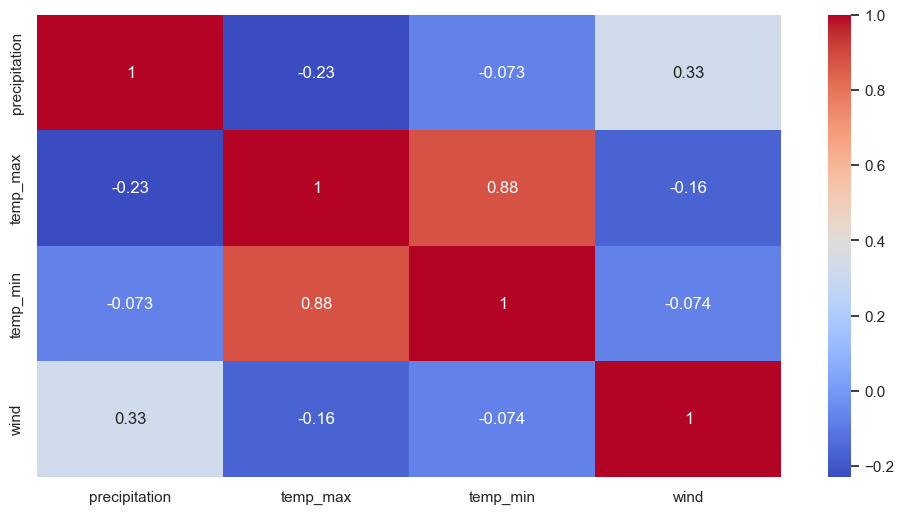

In [14]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

pearsons correlation:  -0.22855481643297043
T test and P value:  TtestResult(statistic=-51.60685279531918, pvalue=0.0, df=2920.0)


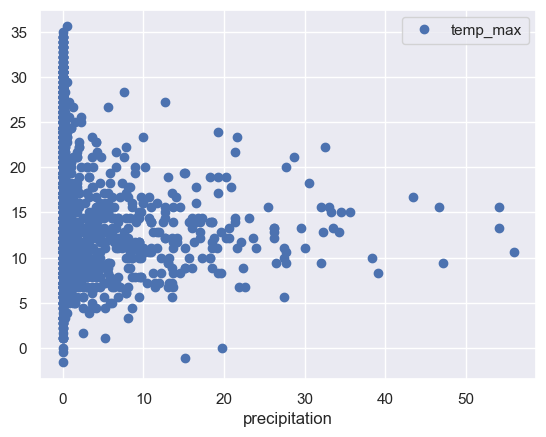

In [15]:
data.plot("precipitation",'temp_max',style='o')
print('pearsons correlation: ',data['precipitation'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['precipitation'],data['temp_max']))

pearsons correlation:  -0.16485663487495483
T test and P value:  TtestResult(statistic=-67.3601643301846, pvalue=0.0, df=2920.0)


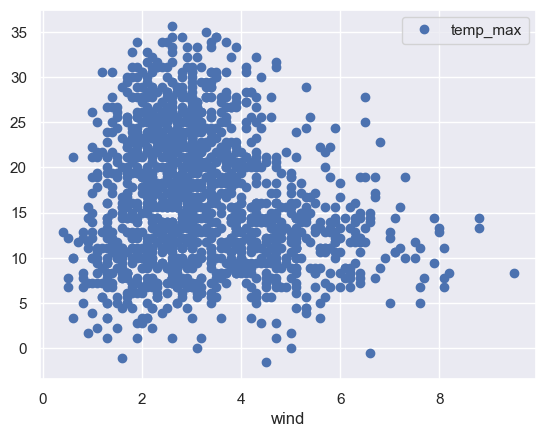

In [16]:
data.plot("wind",'temp_max',style='o')
print('pearsons correlation: ',data['wind'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['wind'],data['temp_max']))

<Axes: xlabel='temp_max'>

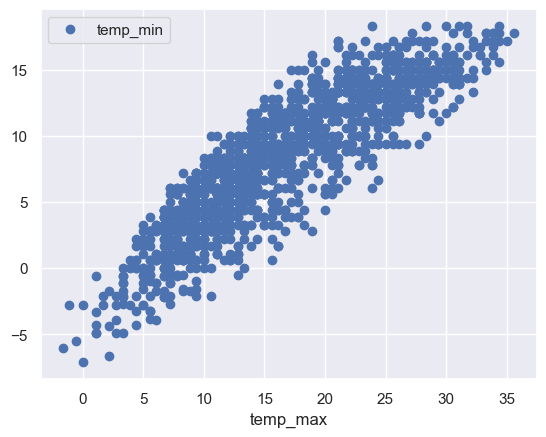

In [17]:
data.plot('temp_max','temp_min',style='o')

In [18]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

<Axes: >

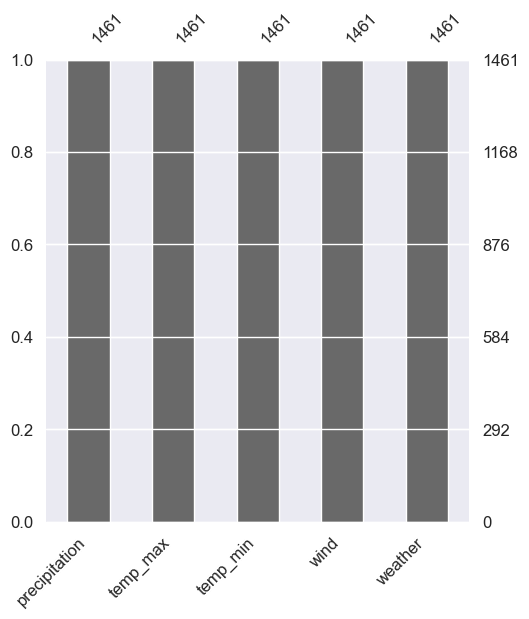

In [19]:
plt.figure(figsize=(12,6))
axz=plt.subplot(1,2,2)
mso.bar(data.drop(['date'],axis=1),ax=axz,fontsize=12)

In [20]:
data=data.drop(['date'],axis=1)

In [26]:
# Print the column names in your DataFrame
print(data.columns)


Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


In [30]:
import pandas as pd

# Assuming "data" is your DataFrame and "precipitation" is the column you want to convert
data['precipitation'] = pd.to_numeric(data['precipitation'], errors='coerce')

# Print rows with non-numeric values in the 'precipitation' column
non_numeric_rows = data[data['precipitation'].isna()]
print("Rows with non-numeric values in 'precipitation' column:")
print(non_numeric_rows)

# Drop rows with NaN values in the 'precipitation' column
data = data.dropna(subset=['precipitation'])

# # Calculate quantiles after converting to numeric
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1

# # Filter the DataFrame based on IQR
# data_filtered = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print non-numeric values in 'precipitation' column (if any)
# non_numeric_values = data_filtered['precipitation'][pd.to_numeric(data_filtered['precipitation'], errors='coerce').isna()].unique()
# print("Non-numeric values in 'precipitation' column:", non_numeric_values)


Rows with non-numeric values in 'precipitation' column:
Empty DataFrame
Columns: [precipitation, temp_max, temp_min, wind, weather]
Index: []


In [32]:
# # Calculate quantiles after converting to numeric
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1

# # Filter the DataFrame based on IQR
# data_filtered = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [33]:
import numpy as np
data.precipitation=np.sqrt(data.precipitation)
data.wind=np.sqrt(data.wind)

<Axes: xlabel='wind', ylabel='Count'>

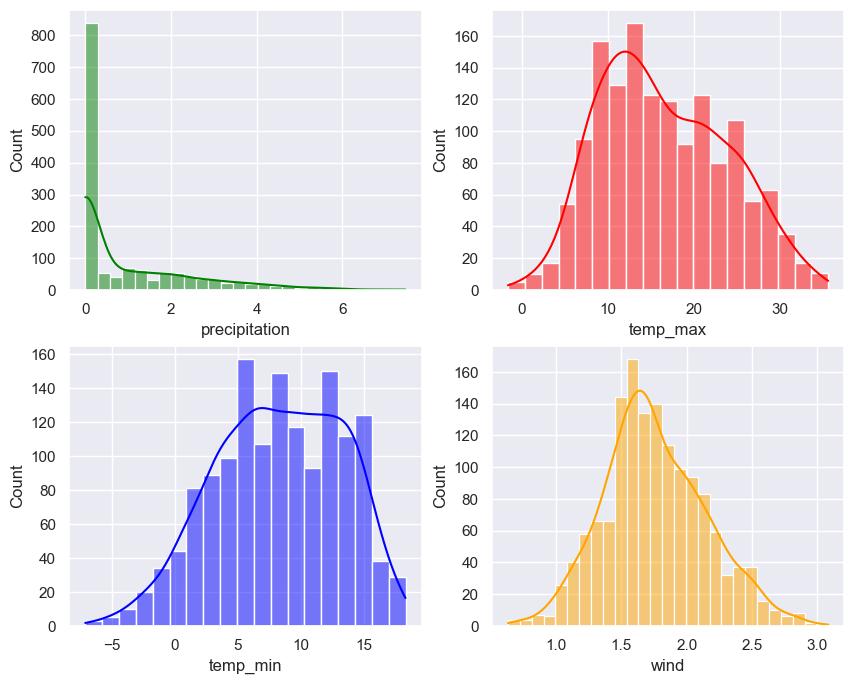

In [34]:
sns.set(style='darkgrid')
fig, axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

In [35]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,drizzle
1,3.301515,10.6,2.8,2.121320,rain
2,0.894427,11.7,7.2,1.516575,rain
3,4.505552,12.2,5.6,2.167948,rain
4,1.140175,8.9,2.8,2.469818,rain


In [36]:
lc=LabelEncoder()
data['weather']=lc.fit_transform(data['weather'])

In [37]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,0
1,3.301515,10.6,2.8,2.121320,2
2,0.894427,11.7,7.2,1.516575,2
3,4.505552,12.2,5.6,2.167948,2
4,1.140175,8.9,2.8,2.469818,2


In [38]:
x=((data.loc[:,data.columns!='weather']).astype(int)).values[:,0:]
y=data['weather'].values

In [39]:
data.weather.unique()

array([0, 2, 4, 3, 1])

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [41]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print('KNN accuracy:{:.2f}%'.format(knn.score(x_test,y_test)*100))

KNN accuracy:74.15%


In [42]:
svm=SVC()
svm.fit(x_train,y_train)
print('SVM accuracy:{:.2f}%'.format(svm.score(x_test,y_test)*100))

SVM accuracy:78.91%


In [43]:
gbc=GradientBoostingClassifier(subsample=0.5,n_estimators=450,max_depth=5,max_leaf_nodes=25)
gbc.fit(x_train,y_train)
print('GBC accuracy:{:.2f}%'.format(gbc.score(x_test,y_test)*100))

GBC accuracy:80.95%


In [44]:
import warnings
warnings.filterwarnings('ignore')
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print('XGB accuracy:{:.2f}%'.format(xgb.score(x_test,y_test)*100))

XGB accuracy:82.31%


In [45]:
parameters = {
    'learning_rate': [1, 2, 3],
    'n_estimators': [100, 500, 1000]
}
cv = GridSearchCV(xgb, param_grid=parameters, scoring='f1_micro', n_jobs=-1, verbose=3)
cv.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             n_jobs=-1,
             param_grid={'learning_rate': [1, 2, 3],
                         'n_estimators': [100, 500, 1000]},
             scoring='f1_micro', verbose=3)

In [46]:
y_pred = cv.predict(x_test)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.25      0.14      0.18         7
           2       0.92      0.86      0.89        66
           3       0.50      1.00      0.67         1
           4       0.79      0.89      0.84        66

    accuracy                           0.82       147
   macro avg       0.59      0.64      0.59       147
weighted avg       0.81      0.82      0.81       147



In [63]:
def predict_weather(): 
    precipitation = float(input("Enter precipitation: ")) 
    max_temperature = float(input("Enter max temperature: ")) 
    min_temperature = float(input("Enter min temperature: ")) 
    wind = float(input("Enter wind: "))

# Create input data
    input_data = [[precipitation, max_temperature, min_temperature, wind]]

    ot=xgb.predict(input_data)
    print('the weather is:')
    if(ot==0):
      print('Drizzle')
    elif (ot==1):
      print('fogg')
    elif (ot==2):
      print('rain')
    elif (ot==3):
      print('snow')
    else:
      print('sun')
    
if __name__ == "__main__":
    predict_weather()

Enter precipitation: 0.1
Enter max temperature: -1000
Enter min temperature: -2000
Enter wind: 2000
the weather is:
sun
